# Amazon Web Scraping Project

In this project, I scrape data from Amazon to find the title and price of a certain listing. I then created a function to continually check the title and price of the listing and add the data to a CSV file along with the day that the record was added. I used a while loop to automatically run the function every 24 hours in order to check if the price changes and on what day the price changed.

<!DOCTYPE html>

<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us">
<!-- sp:feature:head-start -->
<head>
<script>
   var aPageStart = (new Date()).getTime();
  </script>
<meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){retu
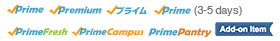

In [4]:
#Import the necessary libraries

import cloudscraper
import pandas as pd
from bs4 import BeautifulSoup
import csv
import datetime
import time
from time import sleep

scraper = cloudscraper.create_scraper()

#Get HTML code from URL using Beautiful Soup

r = scraper.get('https://www.amazon.com/Funny-Data-Systems-Business-Analyst/dp/B07FNW9FGJ/ref=sr_1_3?dchild=1&keywords=data%2Banalyst%2Btshirt&qid=1626655184&sr=8-3&customId=B0752XJYNL&th=1')
soup = BeautifulSoup(r.content, 'html.parser')

#Clean up the HTML code using .prettify()

soup_clean = BeautifulSoup(soup.prettify(), "html.parser")

print(soup_clean)

In [5]:
#Find the title and price of the item based on their ID and class in the HTML code

title = soup_clean.find(id='productTitle').get_text()
price = soup_clean.find(attrs={'class':'aok-offscreen'}).get_text()

print(title)
print(price)


                Funny Got Data MIS Data Systems Business Analyst T-Shirt
               

              $16.99
             


In [6]:
#Remove white space from title and price values and remove dollar sign from price value

title = title.strip()
price = price.strip()[1:]

print(title)
print(price)

Funny Got Data MIS Data Systems Business Analyst T-Shirt
16.99


In [7]:
#Get today's date using datetime

today = datetime.date.today()

print(today)

2023-08-12


In [8]:
#Create CSV file to store the title, price, and date the data was added to the CSV

headers = ['Title', 'Price', 'Date']
data = [title, price, today]

with open('AmazonWebScrapeData.csv', 'w', newline='', encoding='UTF8') as file:
    writer = csv.writer(file)
    writer.writerow(headers)
    writer.writerow(data)

In [9]:
#Appending data to CSV file
data = [title, price, today]

with open('AmazonWebScrapeData.csv', 'a+', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(data)

In [20]:
#Create function to check the price of the item 

def check_price():
    #Get HTML code from URL using Beautiful Soup
    scraper = cloudscraper.create_scraper()
    r = scraper.get('https://www.amazon.com/Funny-Data-Systems-Business-Analyst/dp/B07FNW9FGJ/ref=sr_1_3?dchild=1&keywords=data%2Banalyst%2Btshirt&qid=1626655184&sr=8-3&customId=B0752XJYNL&th=1')
    soup = BeautifulSoup(r.content, 'html.parser')

    #Clean up the HTML code using .prettify()
    soup_clean = BeautifulSoup(soup.prettify(), "html.parser")
    
    print(soup_clean)
    
    #Find the title and price of the item based on their ID and class in the HTML code
    title = soup_clean.find(id='productTitle').get_text()
    price = soup_clean.find(attrs={'class':'aok-offscreen'}).get_text()
    
    #Remove white space from title and price values and remove dollar sign from price value
    title = title.strip()
    price = price.strip()[1:]
    
    #Get today's date using datetime
    today = datetime.date.today()
    
    #Create list of data to be appended as a row of the CSV file
    data = [title, price, today]
    
    #Append data to CSV file
    with open('AmazonWebScrapeData.csv', 'a+', newline='', encoding='UTF8') as file:
        writer = csv.writer(file)
        writer.writerow(data)

<!DOCTYPE html>

<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us">
<!-- sp:feature:head-start -->
<head>
<script>
   var aPageStart = (new Date()).getTime();
  </script>
<meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){retu
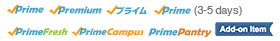

In [ ]:
#Create a while loop to run the check_price() function every 24 hours to check if the item's price has changed

while(True):
    check_price()
    time.sleep(86400)

In [17]:
#Use pandas to view the CSV here as a DataFrame

df = pd.read_csv('/Users/kristenotten/Desktop/AmazonWebScrapeData.csv')

print(df)

                                               Title  Price
0  Funny Got Data MIS Data Systems Business Analy...  16.99
